In [119]:
import torch
import librosa
import numpy as np
import soundfile as sf
from scipy.io import wavfile
from IPython.display import Audio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
import pandas as pd
import os
import seaborn as sns
import matplotlib .pyplot as plt
import librosa.display
import warnings
warnings.filterwarnings('ignore')

In [71]:
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
C:\Users\harsh\anaconda3\lib\site-packages\transformers\models\wav2vec2\tokenization_wav2vec2.py:750: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(


Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [79]:
file_name = 'm2.wav'
Audio(file_name)

In [80]:
data = wavfile.read('m2.wav')
framerate = data[0]
sounddata = data[1]
time = np.arange(0,len(sounddata))/framerate
print('Sampling rate:',framerate,'Hz')

Sampling rate: 48000 Hz


In [81]:
input_audio, _ = librosa.load('m2.wav', sr=16000)

In [82]:
input_values = tokenizer(input_audio, return_tensors="pt").input_values
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = tokenizer.batch_decode(predicted_ids)[0]
print(transcription)

HI MY NIMI HUST WELCOME GUNGE AND WARDIL IT IT OP


In [7]:
print(os.getcwd())
print(os.listdir())

C:\Users\harsh\Desktop\Dab_300_Lab\capstone
['.ipynb_checkpoints', '0788765_Lab4_Supplychainmanagement.ipynb', 'archive (10)', 'archive (10).zip', 'AUDIO_MODEL_FINAL.ipynb', 'EMOTION_CLASSIFIER_FINAL_MODEL.ipynb', 'Facial_Expression_Training.ipynb', 'Facial_recogNet.h5', 'investment.csv', 'm2.wav', 'main.wav', 'model.json', 'model_weights.h5', 'Recording.m4a', 'test', 'train', 'Untitled.ipynb', 'utils', 'webappcogni.py', '__init__ (1).py', '__init__.cpython-36 (1).pyc']


In [198]:
paths = []
labels = []

for dirname, _, filenames in os.walk('D:\speech_data'):
    
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0] 
        labels.append(label.lower())
         

In [199]:
paths[:5]

['D:\\speech_data\\OAF_angry\\OAF_back_angry.wav',
 'D:\\speech_data\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\speech_data\\OAF_angry\\OAF_base_angry.wav',
 'D:\\speech_data\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\speech_data\\OAF_angry\\OAF_bean_angry.wav']

In [200]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [220]:
df = pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,D:\speech_data\OAF_angry\OAF_back_angry.wav,angry
1,D:\speech_data\OAF_angry\OAF_bar_angry.wav,angry
2,D:\speech_data\OAF_angry\OAF_base_angry.wav,angry
3,D:\speech_data\OAF_angry\OAF_bath_angry.wav,angry
4,D:\speech_data\OAF_angry\OAF_bean_angry.wav,angry


# Exploratory data analysis

In [222]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

Text(0, 0.5, '# Audios')

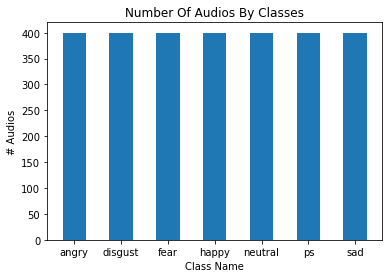

In [226]:
import matplotlib.pyplot as plt

plt.bar(df['label'].unique(),df['label'].value_counts(),width = .5)
plt.title('Number Of Audios By Classes')
plt.xlabel('Class Name')
plt.ylabel('# Audios')
# plt.bar(df, values, color ='maroon',
#         width = 0.4)

In [115]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    


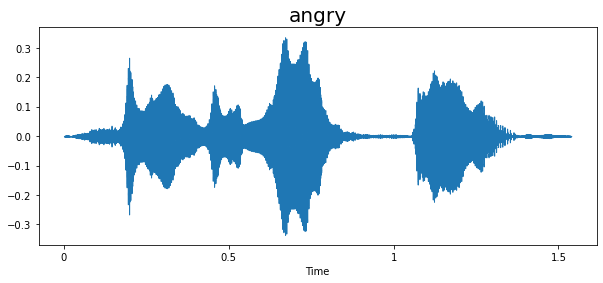

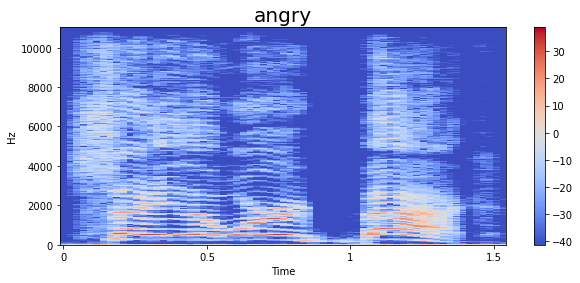

In [120]:
#we can also disply waveplot and specsplot for all the classes  

emotion = 'angry'
path=df['speech'][df['label']==emotion][0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Feature extraction

In [121]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [122]:
extract_mfcc(df['speech'][0])

array([-3.97214874e+02,  7.77846832e+01, -1.99478245e+01, -2.13016663e+01,
       -2.47878647e+00,  1.04415865e+01, -2.07168369e+01, -5.74857569e+00,
       -7.55554676e+00, -2.10370451e-01, -2.18025589e+00,  5.51623225e-01,
        3.94573897e-01,  1.64459980e+00,  2.57582307e+00,  3.15656734e+00,
       -5.01067924e+00, -4.14153624e+00, -1.90491128e+00, -9.96853924e+00,
       -7.81200552e+00, -1.55172932e+00, -7.26189518e+00,  9.65194511e+00,
        8.14204407e+00,  2.19211063e+01,  1.90227432e+01,  2.05200424e+01,
        1.32593021e+01,  8.48793125e+00,  2.54911602e-01,  5.23840904e+00,
        9.45089054e+00,  5.56163883e+00,  2.41641927e+00, -1.74867523e+00,
        4.80002546e+00,  9.37272930e+00,  2.04265857e+00, -1.87645090e+00],
      dtype=float32)

In [123]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [124]:
X_mfcc

0       [-397.21487, 77.78468, -19.947824, -21.301666,...
1       [-465.9048, 99.04303, 0.38121262, -32.46538, -...
2       [-430.20264, 46.719677, 0.9373469, 0.40906978,...
3       [-403.8607, 76.91445, -13.129478, -21.681879, ...
4       [-434.32446, 77.93651, 10.30538, 16.62942, 7.5...
                              ...                        
5595    [-406.84067, 80.915, 31.92094, 47.126034, -2.2...
5596    [-427.2774, 103.10099, 24.231125, 43.610836, 4...
5597    [-378.90057, 81.49411, 34.707623, 40.347103, -...
5598    [-435.18726, 90.38732, 27.89193, 40.06028, -2....
5599    [-422.2736, 71.34581, 31.815186, 46.311543, 4....
Name: speech, Length: 5600, dtype: object

In [127]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(5600, 40)

In [128]:
X = np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [132]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [133]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [147]:
# to categoriacl
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])


In [160]:
y=y.toarray()

In [161]:
y.shape

(5600, 7)

# Creating LSTM model

In [164]:
from keras.models import Sequential
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
    
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 123)               61500     
                                                                 
 dense_9 (Dense)             (None, 64)                7936      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-trai

In [166]:
history=model.fit(X,y,validation_split=0.2,epochs=10,batch_size=512,shuffle=True)

Epoch 1/10
9/9 [==============================] - 2s 184ms/step - loss: 0.0348 - accuracy: 0.9897 - val_loss: 0.0249 - val_accuracy: 0.9920
Epoch 2/10
9/9 [==============================] - 2s 172ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.0256 - val_accuracy: 0.9911
Epoch 3/10
9/9 [==============================] - 2s 185ms/step - loss: 0.0244 - accuracy: 0.9951 - val_loss: 0.0217 - val_accuracy: 0.9911
Epoch 4/10
9/9 [==============================] - 2s 174ms/step - loss: 0.0204 - accuracy: 0.9953 - val_loss: 0.0177 - val_accuracy: 0.9929
Epoch 5/10
9/9 [==============================] - 2s 174ms/step - loss: 0.0183 - accuracy: 0.9958 - val_loss: 0.0154 - val_accuracy: 0.9937
Epoch 6/10
9/9 [==============================] - 2s 172ms/step - loss: 0.0181 - accuracy: 0.9958 - val_loss: 0.0137 - val_accuracy: 0.9937
Epoch 7/10
9/9 [==============================] - 2s 186ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0141 - val_accuracy: 0.9937
Epoch 8/10
9/9 [====

# plot the results

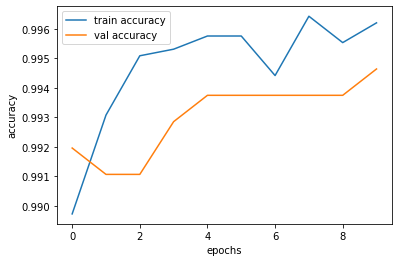

In [167]:
epochs=list(range(10))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

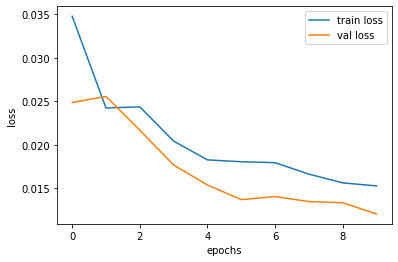

In [168]:
loss=history.history['loss']
val_loss=history.history['val_loss']


plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()